In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.api as sm

In [2]:
df=pd.read_csv("C:/Users/ihoon/Documents/skk/URP/joined_hol.csv",index_col=0,header=0)

In [24]:
df.head()

,temp,rainfall,rain_log,cloud,close_imp,close_diff,day,weeklytrend,monthlytrend,holiday,...,감자전,칼국수,해물파전,디저트,빵,샐러드,스테이크,딸기,과일,아이스크림
date,,,,,,,,,,,,,,,,,,,,,
20.01.01,-2.708333,0.1,-0.995679,8.875000,291.49,-1.14,2,1,1,1,...,228,2705,247,6908,8229,3786,4758,10268,4986,5054
20.01.02,0.987500,0.0,-3.000000,7.333333,290.35,-1.14,3,1,1,0,...,221,2508,193,8006,9440,4731,4197,12314,6223,5158
20.01.03,0.120833,0.0,-3.000000,0.583333,290.74,0.39,4,1,1,1,...,269,2227,193,8269,9637,4701,4043,12390,6423,5119
20.01.04,1.054167,0.0,-3.000000,1.875000,289.97,-0.77,5,1,1,1,...,292,2678,197,8602,9799,4506,4449,13006,5706,5370
20.01.05,1.175000,0.0,-3.000000,3.625000,289.20,-0.77,6,2,1,1,...,296,2904,267,7607,9797,4548,4421,12101,5474,5684


In [4]:
df.isna().sum()

temp            0
rainfall        0
rain_log        0
cloud           0
close_imp       0
close_diff      0
day             0
weeklytrend     0
monthlytrend    0
holiday         0
홈술집술            0
간술간맥간쏘          0
혼술              0
소주              0
맥주              0
막걸리             0
와인              0
치킨              0
고기              0
밥               0
튀김              0
피자              0
치즈              0
파스타             0
김치              0
삼겹살             0
회               0
라면              0
파전              0
김치전             0
감자전             0
칼국수             0
해물파전            0
디저트             0
빵               0
샐러드             0
스테이크            0
딸기              0
과일              0
아이스크림           0
dtype: int64

In [25]:
df.columns

Index(['temp', 'rainfall', 'rain_log', 'cloud', 'close_imp', 'close_diff',
       'day', 'weeklytrend', 'monthlytrend', 'holiday', '홈술집술', '간술간맥간쏘', '혼술',
       '소주', '맥주', '막걸리', '와인', '치킨', '고기', '밥', '튀김', '피자', '치즈', '파스타', '김치',
       '삼겹살', '회', '라면', '파전', '김치전', '감자전', '칼국수', '해물파전', '디저트', '빵', '샐러드',
       '스테이크', '딸기', '과일', '아이스크림'],
      dtype='object')

In [6]:
for i in range(len(df.columns)):
    skew=df[df.columns[i]].skew()
    if skew>1:
        print('{}: {}'.format(df.columns[i], df[df.columns[i]].skew()))

rainfall: 5.583884466068783
rain_log: 1.1047485001954371
홈술집술: 1.9586449999661903
간술간맥간쏘: 3.7436204919288003
막걸리: 1.903004027932026
와인: 1.0156614633731202
치킨: 1.6618194150364753
밥: 1.7573416722563728
튀김: 2.856659350161725
피자: 6.981129947258135
치즈: 3.0171446151350536
삼겹살: 2.6708743907642005
회: 1.0003200540401422
라면: 1.105093503501946
파전: 3.236918989643865
김치전: 4.676834107338745
감자전: 2.2620110381570866
칼국수: 1.142356889508855
해물파전: 1.714586213238524
빵: 1.1406565000401994
스테이크: 24.628028744833948
딸기: 1.3064559642015743
아이스크림: 14.042747313065178


## Feature Engineering
* 강수 유무 피처 생성
* 술안주 버즈 전부 자연로그 변환

In [7]:
df['rain_bin']=(df['rainfall']>0)

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<AxesSubplot:xlabel='rain_bin', ylabel='Count'>

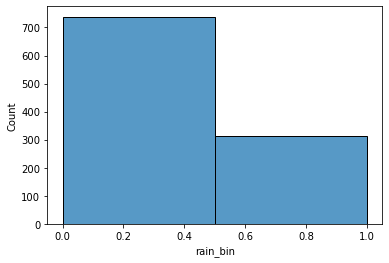

In [8]:
sns.histplot(df['rain_bin'],bins=2)

In [9]:
df['rain_bin'].skew()

0.8890480467926514

In [3]:
 #자연로그 변환
keywords=['소주', '맥주', '막걸리', '와인', '치킨', '고기', '밥', '튀김', '피자', '치즈', '파스타', '김치',
   '삼겹살', '회', '라면', '파전', '김치전', '감자전', '칼국수', '해물파전', '디저트', '빵', '샐러드',
   '스테이크', '딸기', '과일', '아이스크림']
for i in range(len(keywords)):
    df[keywords[i]]=np.log(df[keywords[i]])

## 술문화, 술안주, 술버즈 회귀분석
### 세팅
* 기온: 그대로
* 강수량: 로그값
* 일평균 운량: 기온 및 강수량과 상관계수 높아 제외
* 증시 보간값; 그대로
* 요일: 월화수목/금토일+공휴일 구분

히트맵

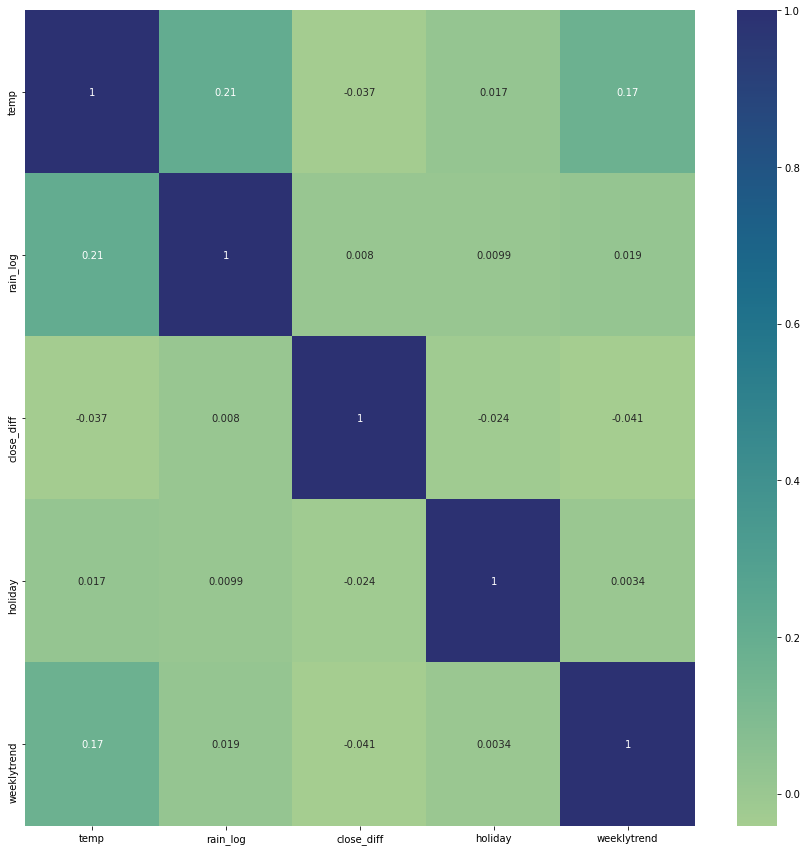

In [5]:
df_heat=df[['temp', 'rain_log', 'close_diff', 'holiday', 'weeklytrend']]
df_corr=df_heat.corr()
plt.figure(figsize=(15,15))
ax=sns.heatmap(df_corr,annot=True,cmap="crest")

In [12]:
df.columns

Index(['temp', 'rainfall', 'rain_log', 'cloud', 'close_imp', 'close_diff',
       'day', 'weeklytrend', 'monthlytrend', 'holiday', '홈술집술', '간술간맥간쏘', '혼술',
       '소주', '맥주', '막걸리', '와인', '치킨', '고기', '밥', '튀김', '피자', '치즈', '파스타', '김치',
       '삼겹살', '회', '라면', '파전', '김치전', '감자전', '칼국수', '해물파전', '디저트', '빵', '샐러드',
       '스테이크', '딸기', '과일', '아이스크림', 'rain_bin'],
      dtype='object')

In [13]:
y_col = ['홈술집술', '간술간맥간쏘', '혼술',
       '소주', '맥주', '막걸리', '와인', '치킨', '고기', '밥', '튀김', '피자', '치즈', '파스타', '김치',
       '삼겹살', '회', '라면', '파전', '김치전', '감자전', '칼국수', '해물파전', '디저트', '빵', '샐러드',
       '스테이크', '딸기', '과일', '아이스크림']
x_cols = ['temp', 'rain_log', 'close_diff', 'C(holiday)','weeklytrend']

for i in range(len(y_col)):
    formula=f"{y_col[i]}~"+"+".join(x_cols)
    model = sm.OLS.from_formula(formula, data=df)
    result = model.fit()
    if result.rsquared_adj>=0: #0.3보다 큰 것만
        print('y:{} | Adj.R2: {:.3f}'.format(y_col[i], result.rsquared_adj))

y:홈술집술 | Adj.R2: 0.234
y:간술간맥간쏘 | Adj.R2: 0.319
y:혼술 | Adj.R2: 0.417
y:소주 | Adj.R2: 0.076
y:맥주 | Adj.R2: 0.422
y:막걸리 | Adj.R2: 0.325
y:와인 | Adj.R2: 0.118
y:치킨 | Adj.R2: 0.347
y:고기 | Adj.R2: 0.200
y:밥 | Adj.R2: 0.112
y:튀김 | Adj.R2: 0.519
y:피자 | Adj.R2: 0.071
y:치즈 | Adj.R2: 0.512
y:파스타 | Adj.R2: 0.208
y:김치 | Adj.R2: 0.145
y:삼겹살 | Adj.R2: 0.257
y:회 | Adj.R2: 0.093
y:라면 | Adj.R2: 0.039
y:파전 | Adj.R2: 0.380
y:김치전 | Adj.R2: 0.308
y:감자전 | Adj.R2: 0.438
y:칼국수 | Adj.R2: 0.100
y:해물파전 | Adj.R2: 0.331
y:디저트 | Adj.R2: 0.182
y:빵 | Adj.R2: 0.080
y:샐러드 | Adj.R2: 0.303
y:스테이크 | Adj.R2: 0.306
y:딸기 | Adj.R2: 0.591
y:과일 | Adj.R2: 0.327
y:아이스크림 | Adj.R2: 0.411


In [14]:
# 개별 확인용
y_col = ['홈술집술']
x_cols = ['temp', 'rain_log', 'close_diff', 'C(holiday)','weeklytrend']
formula=f"{y_col[0]}~"+"+".join(x_cols)
model = sm.OLS.from_formula(formula, data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   홈술집술   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     65.25
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           2.39e-59
Time:                        14:23:53   Log-Likelihood:                -5547.2
No. Observations:                1050   AIC:                         1.111e+04
Df Residuals:                    1044   BIC:                         1.114e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         167.1246      4.202     

## 주종 - 안주 간 corr.

In [15]:
x_cols=['홈술집술', '간술간맥간쏘', '혼술','소주', '맥주', '막걸리', '와인']
y_cols=['치킨', '고기', '밥', '튀김', '피자', '치즈', '파스타', '김치',
       '삼겹살', '회', '라면', '파전', '김치전', '감자전', '칼국수', '해물파전', '디저트', '빵', '샐러드',
       '스테이크', '딸기', '과일', '아이스크림']

In [16]:
## 결정계수
rsq=pd.DataFrame(columns=x_cols)
for i in range(len(y_cols)):
    temp={}
    for j in range(len(x_cols)):
        X=df[x_cols[j]]
        y=df[y_cols[i]]
        linear_regression = sm.OLS(y, X)
        sm_model = linear_regression.fit()
        temp[x_cols[j]]=np.round(sm_model.rsquared,3)
        #print('x: {}, y:{}, 회귀계수: {:.3f}, 결정계수: {:.3f}'.format(x_cols[i],y_cols[j], sm_model.params[0], sm_model.rsquared))
    rsq=rsq.append(temp,ignore_index=True)
rsq.index=y_cols
rsq

,홈술집술,간술간맥간쏘,혼술,소주,맥주,막걸리,와인
치킨,0.852,0.619,0.862,1.000,1.000,0.999,1.000
고기,0.848,0.624,0.860,1.000,1.000,0.999,1.000
밥,0.845,0.621,0.853,1.000,0.999,0.998,1.000
튀김,0.826,0.654,0.839,0.997,0.997,0.996,0.997
피자,0.849,0.616,0.857,0.998,0.999,0.997,0.999
치즈,0.833,0.649,0.842,0.998,0.998,0.997,0.998
파스타,0.852,0.626,0.866,1.000,1.000,0.999,1.000
김치,0.849,0.621,0.860,1.000,1.000,0.999,1.000
삼겹살,0.853,0.624,0.869,0.999,0.999,0.999,0.999
회,0.849,0.623,0.860,1.000,1.000,0.999,1.000


C:\Users\ihoon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54856 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ihoon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ihoon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ihoon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ihoon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47589 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ihoon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50136 missing from c

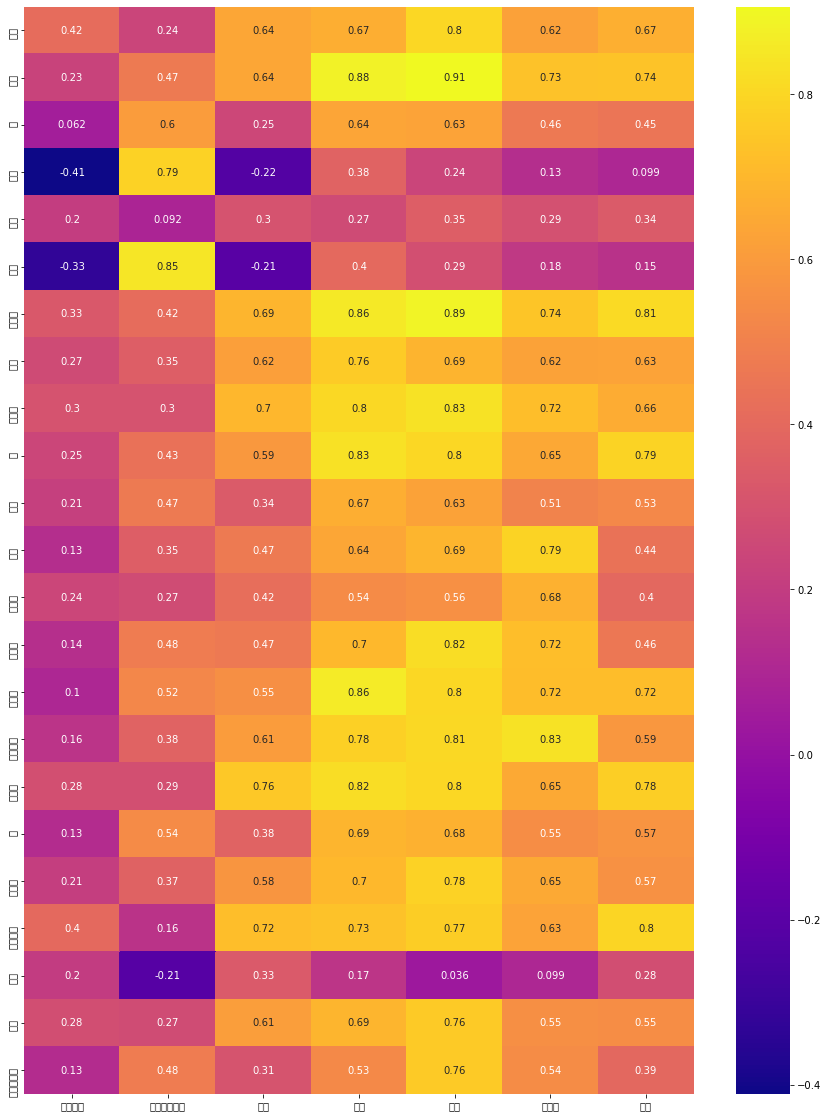

In [17]:
## 상관계수
corr_df=pd.DataFrame(columns=x_cols)
for i in range(len(y_cols)):
    temp={}
    for j in range(len(x_cols)):
        X=df[x_cols[j]]
        y=df[y_cols[i]]
        corr=np.corrcoef(y, X)
        temp[x_cols[j]]=np.round(corr[0][-1],3)
        #print('x: {}, y:{}, 회귀계수: {:.3f}, 결정계수: {:.3f}'.format(x_cols[i],y_cols[j], sm_model.params[0], sm_model.rsquared))
    corr_df=corr_df.append(temp,ignore_index=True)
corr_df.index=y_cols
plt.figure(figsize=(15,20))
ax=sns.heatmap(corr_df,annot=True,cmap="plasma")

In [18]:
## 회귀계수
coef=pd.DataFrame(columns=x_cols)
for i in range(len(y_cols)):
    temp={}
    for j in range(len(x_cols)):
        X=df[x_cols[j]]
        y=df[y_cols[i]]
        linear_regression = sm.OLS(y, X)
        sm_model = linear_regression.fit()
        temp[x_cols[j]]=np.round(sm_model.params[0],3)
        #print('x: {}, y:{}, 회귀계수: {:.3f}, 결정계수: {:.3f}'.format(x_cols[i],y_cols[j], sm_model.params[0], sm_model.rsquared))
    coef=coef.append(temp,ignore_index=True)
coef.index=y_cols
coef

,홈술집술,간술간맥간쏘,혼술,소주,맥주,막걸리,와인
치킨,0.060,0.057,0.010,1.083,1.013,1.203,1.065
고기,0.063,0.060,0.011,1.140,1.065,1.265,1.120
밥,0.068,0.064,0.011,1.226,1.146,1.361,1.205
튀김,0.039,0.039,0.007,0.715,0.668,0.794,0.703
피자,0.060,0.056,0.010,1.081,1.010,1.200,1.062
치즈,0.043,0.042,0.007,0.787,0.736,0.874,0.774
파스타,0.056,0.053,0.009,1.008,0.942,1.119,0.991
김치,0.059,0.056,0.010,1.071,1.001,1.189,1.053
삼겹살,0.054,0.051,0.009,0.967,0.904,1.074,0.950
회,0.055,0.052,0.009,0.994,0.929,1.103,0.977


## 기온 2차항회귀

In [28]:
import statsmodels.formula.api as smf

X = df[['temp', 'rain_log', 'close_diff', 'holiday', 'weeklytrend']]
y_cols=['삼겹살', '회', '라면', '파전', '김치전', '감자전', '칼국수', '해물파전', '디저트', '빵', '샐러드',
       '스테이크', '딸기', '과일', '아이스크림','치킨', '고기', '밥', '튀김', '피자', '치즈', '파스타', '김치',
       '소주','맥주',0.'와인','막걸리','홈술집술','혼술','간술간맥간쏘']

for i in range(len(y_cols)):
    y=df[y_cols[i]]
    quadratic_model = smf.ols(y_cols[i]+"~temp"+"+rain_log+close_diff+ C(holiday)+weeklytrend", data=df).fit()
    if quadratic_model.rsquared_adj>=0:
        print(quadratic_model.summary())
        #print(y_cols[i],': ',quadratic_model.rsquared_adj)

                            OLS Regression Results                            
Dep. Variable:                    삼겹살   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     73.50
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           5.17e-66
Time:                        15:36:48   Log-Likelihood:                -155.62
No. Observations:                1050   AIC:                             323.2
Df Residuals:                    1044   BIC:                             353.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.1579      0.025    3

                            OLS Regression Results                            
Dep. Variable:                   스테이크   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     93.41
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           2.34e-81
Time:                        15:36:48   Log-Likelihood:                -92.330
No. Observations:                1050   AIC:                             196.7
Df Residuals:                    1044   BIC:                             226.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.0507      0.023    3

                            OLS Regression Results                            
Dep. Variable:                     소주   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     18.19
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           2.45e-17
Time:                        15:36:48   Log-Likelihood:                 130.79
No. Observations:                1050   AIC:                            -249.6
Df Residuals:                    1044   BIC:                            -219.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.3355      0.019    4

<AxesSubplot:xlabel='temp', ylabel='맥주'>

C:\Users\ihoon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ihoon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


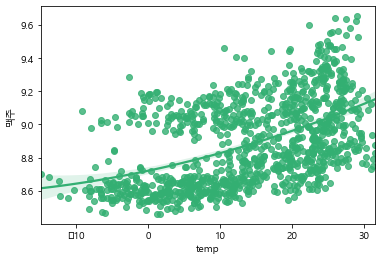

In [42]:
sns.regplot(x="temp",  y="맥주", data=df, order=2, color="#33AF72", scatter= True)

In [20]:
#선형회귀와 비교
X = df['temp']
for i in range(len(y_cols)):
    y=df[y_cols[i]]
    model = sm.OLS(y, X)
    result = model.fit()
    if result.rsquared_adj>=0:
        print(y_cols[i],': ',result.rsquared_adj)

치킨 :  0.659181969769362
고기 :  0.6613519425132621
밥 :  0.6577106573479174
튀김 :  0.666518777860023
피자 :  0.6556987287926729
치즈 :  0.6657056231831221
파스타 :  0.6604536202469766
김치 :  0.6560887774125266
삼겹살 :  0.6629233485448078
회 :  0.658167829612504
라면 :  0.6563511499710906
파전 :  0.6824954301270096
김치전 :  0.6667186687648688
감자전 :  0.6994042372946956
칼국수 :  0.6632424791311724
해물파전 :  0.6840912435301294
디저트 :  0.6583206483021613
빵 :  0.6596508957056475
샐러드 :  0.6639406463099475
스테이크 :  0.6567295401645021
딸기 :  0.6282214737444262
과일 :  0.6619801570488713
아이스크림 :  0.6733222517662587


<AxesSubplot:xlabel='temp', ylabel='맥주'>

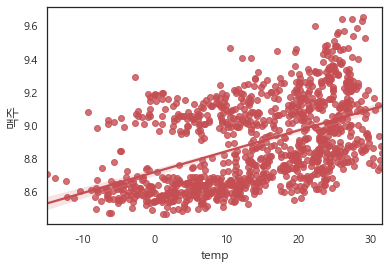

In [262]:
sns.regplot(x="temp",  y="맥주", data=df, color="r", scatter= True)